# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import show

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
df = []
for i in range(3):
    df.append(pd.read_csv(f'/datasets/geo_data_{i}.csv'))
    print(f'В регионе {i+1}')
    display(df[i].head())
    print(df[i].info())
    print(df[i].describe())

В регионе 1


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.3437

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.7340

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.8448

## Обучение и проверка модели

Подготовка признаков и обучение модели

In [3]:
feature = []
target = []
feature_train = []
target_train = []
feature_valid = []
target_valid = []
prob_valid = []
for i in range(3):
    feature.append(df[i].drop(['id','product'], axis = 1))
    target.append(df[i]['product'])
    f_train, f_valid, t_train, t_valid = train_test_split(feature[i],target[i], test_size = 0.25, random_state = 123 )
    
    feature_train.append(f_train)
    target_train.append(t_train)
    feature_valid.append(f_valid)
    target_valid.append(t_valid)
    
    model = LinearRegression()
    model.fit(feature_train[i], target_train[i])
    prob_valid.append(model.predict(feature_valid[i]))
    print(f'Средний объём в {i+1} регионе',sum(prob_valid[i])/len(prob_valid[i]))
    print(f'RMSE предсказания в {i+1} регионе',mean_squared_error(target_valid[i], prob_valid[i])**0.5)

Средний объём в 1 регионе 92.5493618911634
RMSE предсказания в 1 регионе 37.64786282376176
Средний объём в 2 регионе 69.28001860653958
RMSE предсказания в 2 регионе 0.8954139804944313
Средний объём в 3 регионе 95.09859933591403
RMSE предсказания в 3 регионе 40.12803006598514


**Выводы:** в 1 и 3 регионе предсказания, с бОльшей ошибкой.

## Подготовка к расчёту прибыли

In [4]:
BUDGET = 10**10
PROFIT_ONE_UNIT = 450000
COUNT_WELL = 200

mean_count_unit = BUDGET/PROFIT_ONE_UNIT/COUNT_WELL
print(mean_count_unit)


def calc_profit( targ, pred, count):

    predict_slice = pred.sort_values(ascending = False).head(count)
    best_profit = (targ.loc[predict_slice.index].sum()*PROFIT_ONE_UNIT) - BUDGET
    return best_profit/1000000


111.11111111111111


**Выводы:** Чтобы бурение было безубыточным в 200 скважинах в среднем должно быть не менее 112 тыс.баррелей запасов.

## Расчёт прибыли и рисков 

AxesSubplot(0.125,0.125;0.775x0.755)
Средний доход в регионе 1 477.4168242664123
Доверительный 95% интервал дохода в регионе 1, между -57.99391179927572 и 974.8220147728731
Риск убытка 4.1000000000000005%
AxesSubplot(0.125,0.125;0.775x0.755)
Средний доход в регионе 2 467.47768391890946
Доверительный 95% интервал дохода в регионе 2, между 68.76437566249166 и 871.4920973551784
Риск убытка 1.0%
AxesSubplot(0.125,0.125;0.775x0.755)
Средний доход в регионе 3 362.1327806198197
Доверительный 95% интервал дохода в регионе 3, между -182.9922332490984 и 870.9668515726878
Риск убытка 8.9%


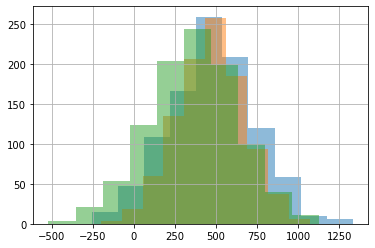

In [5]:
state = np.random.RandomState(123)
  

for i in range(3):
    target_valid[i] = target_valid[i].reset_index(drop = True)
    prob_valid[i] = pd.Series(prob_valid[i])
    values = []
    for j in range(1000):
        
        target_subsample = target_valid[i].sample(n = 500, replace = True , random_state = state)
        probs_subsample = prob_valid[i].loc[target_subsample.index]
        target_subsample = target_subsample.reset_index(drop = True)
        probs_subsample = probs_subsample.reset_index(drop = True)
        values.append(calc_profit(target_subsample, probs_subsample, 200))
        
       
    values = pd.Series(values)
    risk = (values < 0).mean()*100
    print(values.hist(alpha = .5))
    print(f'Средний доход в регионе {i+1}',values.mean())
    print(f'Доверительный 95% интервал дохода в регионе {i+1}, между {values.quantile(0.025)} и {values.quantile(0.975) }')
    print(f'Риск убытка {risk}%')

**Выводы:** только во втором регионе скважины принесут прибыль с вероятностью 99%, в остальных регионах риск получить убыток более 2,5%, при условии, что доход с каждой единицы продукта составляет 450 тыс. рублей и бюджет на разработку скважин в регионе — 10 млрд рублей.